# **Konversi Statistika dan kebijakan**

## **Import library**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from datetime import datetime, timedelta
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

## **Preporcessing data**

In [2]:
url='https://drive.google.com/file/d/16RShrtNcnlB8gLWX_EfTlXBoXmHGK7nU/view?usp=drive_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

In [3]:
df.head()

,Lokasi,X,Y,Tanggal,PM10,PM2.5,SO2,CO,O3,NO2,HC
0,Wonorejo,"7,31185","112,7891639",1-Jan-19,12.0,0.0,8.7,0.0,11.8,3.1,0.0
1,Wonorejo,"7,31185","112,7891639",2-Jan-19,12.0,0.0,6.9,0.0,10.1,0.0,0.0
2,Wonorejo,"7,31185","112,7891639",3-Jan-19,8.5,0.0,7.3,0.0,6.0,0.0,0.0
3,Wonorejo,"7,31185","112,7891639",4-Jan-19,4.4,0.0,7.5,0.0,8.8,0.0,0.0
4,Wonorejo,"7,31185","112,7891639",5-Jan-19,3.7,0.0,9.3,0.0,10.4,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6007 entries, 0 to 6006
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Lokasi   6007 non-null   object 
 1   X        6007 non-null   object 
 2   Y        6007 non-null   object 
 3   Tanggal  6007 non-null   object 
 4   PM10     6007 non-null   float64
 5   PM2.5    6007 non-null   float64
 6   SO2      6007 non-null   float64
 7   CO       6007 non-null   float64
 8   O3       6007 non-null   float64
 9   NO2      6007 non-null   float64
 10  HC       6007 non-null   float64
dtypes: float64(7), object(4)
memory usage: 516.4+ KB


### **Membagi Dataset**

In [5]:
# Memfilter data untuk lokasi "Tandes"
df_tandes = df[df['Lokasi'] == 'Tandes']

# Menghapus kolom "X" dan "Y"
df_tandes = df_tandes.drop(columns=['X', 'Y'])

# Reset index dan drop kolom nomor jika berasal dari CSV
df_tandes = df_tandes.reset_index(drop=True)

# Membagi data menjadi 80% untuk training dan 20% untuk testing berdasarkan indeks
split_index = int(len(df_tandes) * 0.8)
df_training_tandes = df_tandes.iloc[:split_index]
df_testing_tandes = df_tandes.iloc[split_index:]

# Menampilkan informasi dari kedua dataset
print(f"Data Training: {df_training_tandes.shape}")
print(f"Data Testing : {df_testing_tandes.shape}")


Data Training: (1410, 9)
Data Testing : (353, 9)


In [6]:
df_training_tandes.head()

,Lokasi,Tanggal,PM10,PM2.5,SO2,CO,O3,NO2,HC
0,Tandes,1-Jan-20,19.0,55.6,21.2,39.1,35.0,2.5,0.0
1,Tandes,2-Jan-20,12.0,41.9,21.2,41.7,36.7,3.1,0.0
2,Tandes,3-Jan-20,21.0,58.1,23.1,36.5,36.7,2.5,0.0
3,Tandes,4-Jan-20,13.0,45.2,26.9,31.3,32.1,2.5,0.0
4,Tandes,5-Jan-20,12.0,38.7,35.6,23.3,27.1,2.5,0.0


In [7]:
df_testing_tandes.head()

,Lokasi,Tanggal,PM10,PM2.5,SO2,CO,O3,NO2,HC
1410,Tandes,11-Nov-23,60.0,94.5,32.7,18.8,10.8,1.2,32.2
1411,Tandes,12-Nov-23,52.0,82.0,29.8,21.1,10.0,0.6,25.6
1412,Tandes,13-Nov-23,48.0,76.9,26.9,19.5,10.4,1.2,25.6
1413,Tandes,14-Nov-23,41.0,71.9,29.8,20.7,10.0,1.2,25.6
1414,Tandes,15-Nov-23,51.5,82.0,30.8,25.2,10.4,1.2,28.9


In [8]:
# Simpan hasil prediksi ke dalam file Excel tanpa indeks
df_training_tandes.to_excel('Training_udara.xlsx', index=False)

In [9]:
# Simpan hasil prediksi ke dalam file Excel tanpa indeks
df_testing_tandes.to_excel('Testing_udara.xlsx', index=False)

In [10]:
df_testing_tandes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 1410 to 1762
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Lokasi   353 non-null    object 
 1   Tanggal  353 non-null    object 
 2   PM10     353 non-null    float64
 3   PM2.5    353 non-null    float64
 4   SO2      353 non-null    float64
 5   CO       353 non-null    float64
 6   O3       353 non-null    float64
 7   NO2      353 non-null    float64
 8   HC       353 non-null    float64
dtypes: float64(7), object(2)
memory usage: 24.9+ KB


In [11]:
df_training_tandes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1410 entries, 0 to 1409
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Lokasi   1410 non-null   object 
 1   Tanggal  1410 non-null   object 
 2   PM10     1410 non-null   float64
 3   PM2.5    1410 non-null   float64
 4   SO2      1410 non-null   float64
 5   CO       1410 non-null   float64
 6   O3       1410 non-null   float64
 7   NO2      1410 non-null   float64
 8   HC       1410 non-null   float64
dtypes: float64(7), object(2)
memory usage: 99.3+ KB


### **Mengcopy Data set**

In [12]:
# Memfilter data untuk lokasi "Tandes" dan membuat df_tandes
df_tandes = df_training_tandes[df_training_tandes['Lokasi'] == 'Tandes'].copy()

# Menambahkan kolom "Max" dengan nilai maksimum dari parameter (PM10, PM2.5, SO2, CO, O3, NO2, HC)
parameter_columns = ['PM10', 'PM2.5', 'SO2', 'CO', 'O3', 'NO2', 'HC']
df_tandes['Max'] = df_tandes[parameter_columns].max(axis=1)

# Menambahkan penilaian ISPU berdasarkan nilai "Max"
def ispu_category(value):
    if 1 <= value <= 50:
        return 'Baik'
    elif 51 <= value <= 100:
        return 'Sedang'
    elif 101 <= value <= 150:
        return 'Tidak Sehat'
    elif 151 <= value <= 200:
        return 'Sangat tidak sehat'
    else:
        return 'Berbahaya'

df_tandes['Kategori'] = df_tandes['Max'].apply(ispu_category)

# Membuat df_tandess yang sama dengan df_tandes
df_tandess = df_tandes.copy()

### **df_tandess**

In [13]:
# Menampilkan hasil
df_tandes.head()

,Lokasi,Tanggal,PM10,PM2.5,SO2,CO,O3,NO2,HC,Max,Kategori
0,Tandes,1-Jan-20,19.0,55.6,21.2,39.1,35.0,2.5,0.0,55.6,Sedang
1,Tandes,2-Jan-20,12.0,41.9,21.2,41.7,36.7,3.1,0.0,41.9,Baik
2,Tandes,3-Jan-20,21.0,58.1,23.1,36.5,36.7,2.5,0.0,58.1,Sedang
3,Tandes,4-Jan-20,13.0,45.2,26.9,31.3,32.1,2.5,0.0,45.2,Baik
4,Tandes,5-Jan-20,12.0,38.7,35.6,23.3,27.1,2.5,0.0,38.7,Baik


In [14]:
# Simpan hasil prediksi ke dalam file Excel tanpa indeks
df_tandess.to_excel('training_Tandes_udara.xlsx', index=False)

### **df_tandess**

In [15]:
df_tandess.head()

,Lokasi,Tanggal,PM10,PM2.5,SO2,CO,O3,NO2,HC,Max,Kategori
0,Tandes,1-Jan-20,19.0,55.6,21.2,39.1,35.0,2.5,0.0,55.6,Sedang
1,Tandes,2-Jan-20,12.0,41.9,21.2,41.7,36.7,3.1,0.0,41.9,Baik
2,Tandes,3-Jan-20,21.0,58.1,23.1,36.5,36.7,2.5,0.0,58.1,Sedang
3,Tandes,4-Jan-20,13.0,45.2,26.9,31.3,32.1,2.5,0.0,45.2,Baik
4,Tandes,5-Jan-20,12.0,38.7,35.6,23.3,27.1,2.5,0.0,38.7,Baik


In [16]:
df_tandess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1410 entries, 0 to 1409
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Lokasi    1410 non-null   object 
 1   Tanggal   1410 non-null   object 
 2   PM10      1410 non-null   float64
 3   PM2.5     1410 non-null   float64
 4   SO2       1410 non-null   float64
 5   CO        1410 non-null   float64
 6   O3        1410 non-null   float64
 7   NO2       1410 non-null   float64
 8   HC        1410 non-null   float64
 9   Max       1410 non-null   float64
 10  Kategori  1410 non-null   object 
dtypes: float64(8), object(3)
memory usage: 121.3+ KB


In [17]:
df_tandess.head()

,Lokasi,Tanggal,PM10,PM2.5,SO2,CO,O3,NO2,HC,Max,Kategori
0,Tandes,1-Jan-20,19.0,55.6,21.2,39.1,35.0,2.5,0.0,55.6,Sedang
1,Tandes,2-Jan-20,12.0,41.9,21.2,41.7,36.7,3.1,0.0,41.9,Baik
2,Tandes,3-Jan-20,21.0,58.1,23.1,36.5,36.7,2.5,0.0,58.1,Sedang
3,Tandes,4-Jan-20,13.0,45.2,26.9,31.3,32.1,2.5,0.0,45.2,Baik
4,Tandes,5-Jan-20,12.0,38.7,35.6,23.3,27.1,2.5,0.0,38.7,Baik


## **Proses 1 membuat algoritma dengan metode KNN**

In [18]:
# Pilih variabel independen dan target
X = df_tandes[['PM10', 'PM2.5', 'SO2', 'CO', 'O3', 'NO2', 'HC']]
y = df_tandes['Kategori']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Normalisasi data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Mengaktifkan fungsi klasifikasi KNN
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

# Prediksi dengan data uji
y_pred = knn.predict(X_test)

# Evaluasi hasil prediksi
print(classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

              Baik       0.92      0.94      0.93        81
         Berbahaya       0.80      0.50      0.62         8
Sangat tidak sehat       1.00      1.00      1.00         4
            Sedang       0.97      0.97      0.97       189

          accuracy                           0.95       282
         macro avg       0.92      0.85      0.88       282
      weighted avg       0.95      0.95      0.95       282



### **Grafik Line plot jumlah K=n**

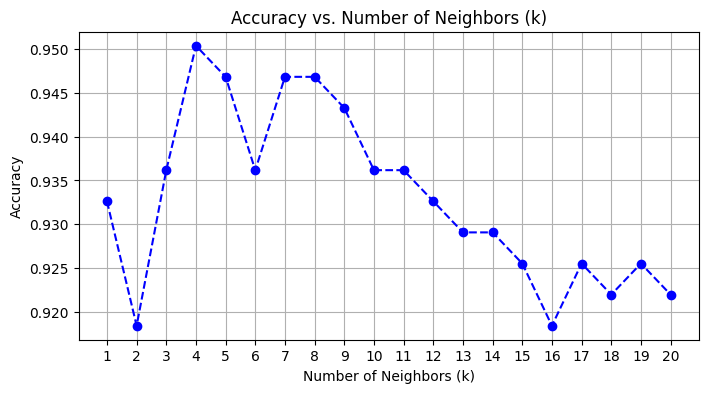

In [19]:
# Menyimpan akurasi untuk setiap nilai k
k_range = range(1, 21)
accuracies = []

# Menghitung akurasi untuk nilai k yang berbeda
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracies.append(knn.score(X_test, y_test))

# Plot akurasi untuk setiap nilai k
plt.figure(figsize=(8, 4))
plt.plot(k_range, accuracies, marker='o', linestyle='--', color='b')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, 21, 1))
plt.grid()
plt.show()

## **Proses 2 melakukan Prediksi pada  Data testing**

In [20]:
# Jangan dirunning

# Hapus kolom yang tidak diperlukan pada data latih
df_tandes = df_tandes.drop(columns=['Lokasi', 'Tanggal'], errors='ignore')

# Pilih variabel independen dan target
X = df_tandes[['PM10', 'PM2.5', 'SO2', 'CO', 'O3', 'NO2', 'HC']]
y = df_tandes['Kategori']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Normalisasi data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Mengaktifkan fungsi klasifikasi KNN
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

# Prediksi dengan data uji
y_pred = knn.predict(X_test)

# Hapus kolom yang tidak diperlukan pada data testing kolom Nomor
df_testing_tandes = df_testing_tandes.loc[:, ~df_testing_tandes.columns.str.contains('^Nomor')]

# Pilih fitur yang sama dengan data latih
X_new = df_testing_tandes[['PM10', 'PM2.5', 'SO2', 'CO', 'O3', 'NO2', 'HC']]

# Standarisasi data baru dengan scaler yang sudah dilatih
X_new_scaled = scaler.transform(X_new)

# Prediksi kualitas udara untuk data baru
predictions = knn.predict(X_new_scaled)

# Menambahkan hasil prediksi ke data baru tanpa menghapus kolom 'Lokasi' dan 'Tanggal'
df_testing_tandes['kategori'] = predictions

# Tampilkan hasil prediksi beserta lokasi dan tanggal
df_tandes_testing_result = df_testing_tandes.reset_index(drop=True)
print("Prediksi Kualitas Udara untuk data baru:")
df_tandes_testing_result.head()

Prediksi Kualitas Udara untuk data baru:


,Lokasi,Tanggal,PM10,PM2.5,SO2,CO,O3,NO2,HC,kategori
0,Tandes,11-Nov-23,60.0,94.5,32.7,18.8,10.8,1.2,32.2,Sedang
1,Tandes,12-Nov-23,52.0,82.0,29.8,21.1,10.0,0.6,25.6,Sedang
2,Tandes,13-Nov-23,48.0,76.9,26.9,19.5,10.4,1.2,25.6,Sedang
3,Tandes,14-Nov-23,41.0,71.9,29.8,20.7,10.0,1.2,25.6,Sedang
4,Tandes,15-Nov-23,51.5,82.0,30.8,25.2,10.4,1.2,28.9,Sedang


In [21]:
# Hapus kolom yang tidak diperlukan pada data testing kolom Nomor
df_testing_tandes = df_testing_tandes.loc[:, ~df_testing_tandes.columns.str.contains('^Nomor')]

# Pilih fitur yang sama dengan data latih
X_new = df_testing_tandes[['PM10', 'PM2.5', 'SO2', 'CO', 'O3', 'NO2', 'HC']]

# Standarisasi data baru dengan scaler yang sudah dilatih
X_new_scaled = scaler.transform(X_new)

# Prediksi kualitas udara untuk data baru
predictions = knn.predict(X_new_scaled)

# Menambahkan hasil prediksi ke data baru tanpa menghapus kolom 'Lokasi' dan 'Tanggal'
df_testing_tandes['kategori'] = predictions

# Tampilkan hasil prediksi beserta lokasi dan tanggal
df_tandes_testing_result = df_testing_tandes.reset_index(drop=True)
df_tandes_testing_result.head()

,Lokasi,Tanggal,PM10,PM2.5,SO2,CO,O3,NO2,HC,kategori
0,Tandes,11-Nov-23,60.0,94.5,32.7,18.8,10.8,1.2,32.2,Sedang
1,Tandes,12-Nov-23,52.0,82.0,29.8,21.1,10.0,0.6,25.6,Sedang
2,Tandes,13-Nov-23,48.0,76.9,26.9,19.5,10.4,1.2,25.6,Sedang
3,Tandes,14-Nov-23,41.0,71.9,29.8,20.7,10.0,1.2,25.6,Sedang
4,Tandes,15-Nov-23,51.5,82.0,30.8,25.2,10.4,1.2,28.9,Sedang


### **Classification report data Testing**

In [22]:
# Tampilkan classification report
print(classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

              Baik       0.92      0.94      0.93        81
         Berbahaya       0.80      0.50      0.62         8
Sangat tidak sehat       1.00      1.00      1.00         4
            Sedang       0.97      0.97      0.97       189

          accuracy                           0.95       282
         macro avg       0.92      0.85      0.88       282
      weighted avg       0.95      0.95      0.95       282



### **Menggabungkan kolom data training dan hasil prediksi data testing**

In [23]:
# Hapus kolom yang tidak diperlukan dari df_tandess
df_tandess = df_tandess.drop(columns=['Max'], errors='ignore')

# Gabungkan df_tandess dan df_tandes_testing_result
df_tandes_combine = pd.concat([df_tandess, df_tandes_testing_result], ignore_index=True)

# Ganti NaN di 'Kategori' dengan nilai dari 'kategori'
df_tandes_combine['Kategori'] = df_tandes_combine['Kategori'].fillna(df_tandes_combine['kategori'])

# Hapus kolom 'kategori' yang sudah tidak diperlukan
df_tandes_combine = df_tandes_combine.drop(columns=['kategori'], errors='ignore')

# Tampilkan hasil
df_tandes_combine

,Lokasi,Tanggal,PM10,PM2.5,SO2,CO,O3,NO2,HC,Kategori
0,Tandes,1-Jan-20,19.0,55.6,21.2,39.1,35.0,2.5,0.0,Sedang
1,Tandes,2-Jan-20,12.0,41.9,21.2,41.7,36.7,3.1,0.0,Baik
2,Tandes,3-Jan-20,21.0,58.1,23.1,36.5,36.7,2.5,0.0,Sedang
3,Tandes,4-Jan-20,13.0,45.2,26.9,31.3,32.1,2.5,0.0,Baik
4,Tandes,5-Jan-20,12.0,38.7,35.6,23.3,27.1,2.5,0.0,Baik
...,...,...,...,...,...,...,...,...,...,...
1758,Tandes,24-Oct-24,16.0,68.2,48.1,15.7,10.8,17.5,4.4,Sedang
1759,Tandes,25-Oct-24,16.0,79.4,48.1,15.0,10.8,17.5,5.6,Sedang
1760,Tandes,26-Oct-24,16.0,63.2,48.1,14.4,11.2,17.5,1.1,Sedang
1761,Tandes,27-Oct-24,16.0,61.9,46.2,12.4,11.2,17.5,2.2,Sedang


### **Pengecekan NaN pada data**

In [24]:
print("\nJumlah NaN setelah penggabungan:")
print(df_tandes_combine.isnull().sum())


Jumlah NaN setelah penggabungan:
Lokasi      0
Tanggal     0
PM10        0
PM2.5       0
SO2         0
CO          0
O3          0
NO2         0
HC          0
Kategori    0
dtype: int64


## **Proses 3 melakukan Prediksi 30 hari kedepan dengan menggabungkan 2 data sebelumnya**

In [25]:
# Hapus kolom yang tidak diperlukan pada data latih
df_tandes = df_tandes_combine.drop(columns=['Lokasi', 'Tanggal'], errors='ignore')

# Pilih variabel independen dan target
X = df_tandes[['PM10', 'PM2.5', 'SO2', 'CO', 'O3', 'NO2', 'HC']]
y = df_tandes['Kategori']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Normalisasi data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Mengaktifkan fungsi klasifikasi KNN
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

# Ambil tanggal terakhir dari data dan tanggal awal prediksi
last_date = pd.to_datetime("2024-10-28")    # Tanggal terakhir dari data
start_date = last_date + timedelta(days=1)  # Tanggal Mulai prediksi
lokasi = 'Tandes'

# Buat list untuk menyimpan hasil prediksi
predictions_list = []

# Buat DataFrame untuk 30 hari ke depan
for i in range(30):
    new_date = start_date + timedelta(days=i)

    # Ambil nilai terakhir dari data gabungan untuk prediksi
    last_row = df_tandes.iloc[-1]

    # Buat data baru berdasarkan nilai terakhir
    new_row = {
        'PM10': np.random.normal(last_row['PM10'], 10),
        'PM2.5': np.random.normal(last_row['PM2.5'], 5),
        'SO2': np.random.normal(last_row['SO2'], 2),
        'CO': np.random.normal(last_row['CO'], 2),
        'O3': np.random.normal(last_row['O3'], 3),
        'NO2': np.random.normal(last_row['NO2'], 2),
        'HC': np.random.normal(last_row['HC'], 5),
    }
    predictions_list.append(new_row)

# Buat DataFrame untuk 30 hari ke depan
df_future = pd.DataFrame(predictions_list)

# Standarisasi data baru dengan scaler yang sudah dilatih
X_future_scaled = scaler.transform(df_future)

# Prediksi kualitas udara untuk data baru
predictions = knn.predict(X_future_scaled)

# Buat DataFrame hasil prediksi
df_predicted = pd.DataFrame({
    'Lokasi': lokasi,
    'Tanggal': [(start_date + timedelta(days=i)).strftime('%d-%b-%y') for i in range(30)],
    'PM10': df_future['PM10'],
    'PM2.5': df_future['PM2.5'],
    'SO2': df_future['SO2'],
    'CO': df_future['CO'],
    'O3': df_future['O3'],
    'NO2': df_future['NO2'],
    'HC': df_future['HC'],
    'kategori': predictions
})

# Tampilkan hasil prediksi
df_predicted.head()

,Lokasi,Tanggal,PM10,PM2.5,SO2,CO,O3,NO2,HC,kategori
0,Tandes,29-Oct-24,-2.541169,41.722488,43.868595,11.950566,13.269894,15.662550,19.896009,Baik
1,Tandes,30-Oct-24,24.043435,59.284135,46.886581,12.830886,5.158855,15.502839,2.193777,Sedang
2,Tandes,31-Oct-24,10.575451,63.473278,47.011601,8.017834,6.743280,20.327002,7.061550,Sedang
3,Tandes,01-Nov-24,9.909332,60.702093,48.775583,10.600076,14.434190,19.766925,4.293372,Sedang
4,Tandes,02-Nov-24,5.704429,68.294255,47.042079,10.442116,13.317368,19.019598,12.887185,Sedang


### **Save data hasil Prediksi**

In [26]:
# Simpan hasil prediksi ke dalam file CSV tanpa indeks
df_predicted.to_csv('prediksi_kualitas_udara.csv', index=False)

### **Classification report data prediksi**

In [27]:
# Prediksi dengan data uji
y_pred = knn.predict(X_test)

# Buat classification report
report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Tampilkan hasil
print("Classification Report:")
print(report)
print(f"Accuracy Prediksi data udara : {accuracy:.2f}%")

Classification Report:
                    precision    recall  f1-score   support

              Baik       0.92      0.91      0.92        94
         Berbahaya       0.75      0.60      0.67        15
Sangat tidak sehat       1.00      1.00      1.00         9
            Sedang       0.95      0.97      0.96       235

          accuracy                           0.94       353
         macro avg       0.91      0.87      0.89       353
      weighted avg       0.94      0.94      0.94       353

Accuracy Prediksi data udara : 0.94%


### **Line Chart**

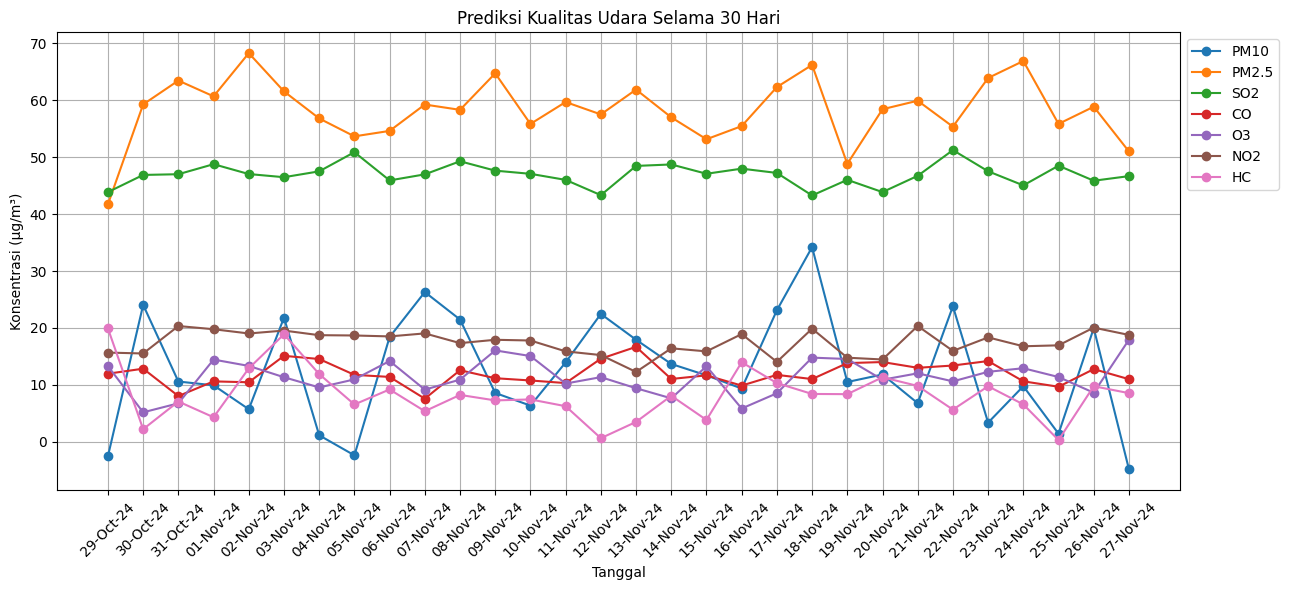

In [28]:
# Mengatur ukuran grafik
plt.figure(figsize=(12, 6))

# Membuat line chart untuk PM10, PM2.5, SO2, CO, O3, NO2, HC
plt.plot(df_predicted['Tanggal'], df_predicted['PM10'], label='PM10', marker='o')
plt.plot(df_predicted['Tanggal'], df_predicted['PM2.5'], label='PM2.5', marker='o')
plt.plot(df_predicted['Tanggal'], df_predicted['SO2'], label='SO2', marker='o')
plt.plot(df_predicted['Tanggal'], df_predicted['CO'], label='CO', marker='o')
plt.plot(df_predicted['Tanggal'], df_predicted['O3'], label='O3', marker='o')
plt.plot(df_predicted['Tanggal'], df_predicted['NO2'], label='NO2', marker='o')
plt.plot(df_predicted['Tanggal'], df_predicted['HC'], label='HC', marker='o')

# Menambahkan judul dan label
plt.title('Prediksi Kualitas Udara Selama 30 Hari')
plt.xlabel('Tanggal')
plt.ylabel('Konsentrasi (µg/m³)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()

# Menempatkan legenda di luar grafik
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Menampilkan grafik
plt.show()

### **Bar Chart**

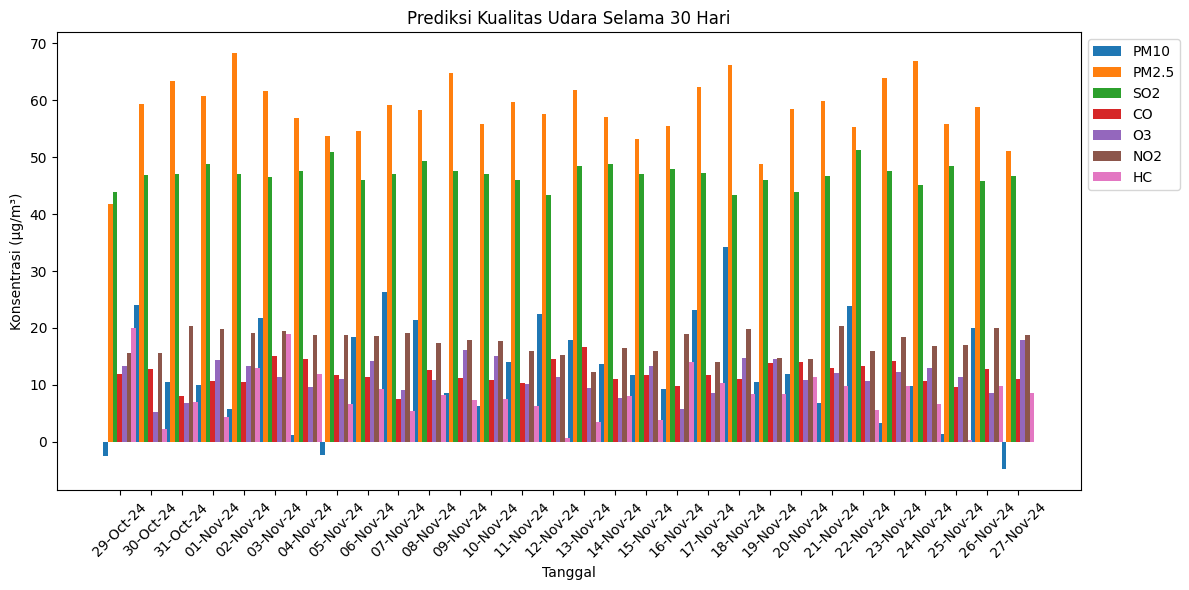

In [29]:
# Mengatur ukuran grafik
plt.figure(figsize=(12, 6))

# Menentukan lebar bar
bar_width = 0.15
index = range(len(df_predicted))

# Membuat bar chart untuk setiap parameter
plt.bar(index, df_predicted['PM10'], bar_width, label='PM10')
plt.bar([i + bar_width for i in index], df_predicted['PM2.5'], bar_width, label='PM2.5')
plt.bar([i + 2 * bar_width for i in index], df_predicted['SO2'], bar_width, label='SO2')
plt.bar([i + 3 * bar_width for i in index], df_predicted['CO'], bar_width, label='CO')
plt.bar([i + 4 * bar_width for i in index], df_predicted['O3'], bar_width, label='O3')
plt.bar([i + 5 * bar_width for i in index], df_predicted['NO2'], bar_width, label='NO2')
plt.bar([i + 6 * bar_width for i in index], df_predicted['HC'], bar_width, label='HC')

# Menambahkan judul dan label
plt.title('Prediksi Kualitas Udara Selama 30 Hari')
plt.xlabel('Tanggal')
plt.ylabel('Konsentrasi (µg/m³)')
plt.xticks([i + 3 * bar_width for i in index], df_predicted['Tanggal'], rotation=45)

# Menempatkan legenda di luar grafik
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()

# Menampilkan grafik
plt.show()

### **Pie Chart**

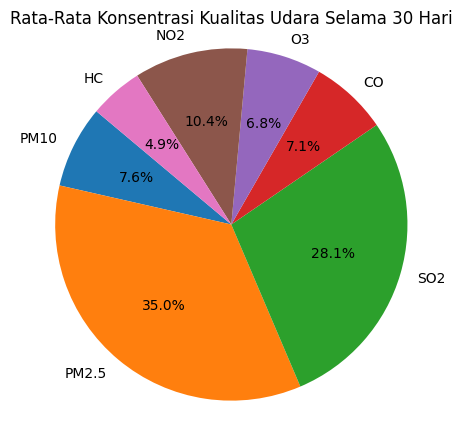

In [30]:
# Menghitung rata-rata untuk setiap parameter
average_values = df_predicted[['PM10', 'PM2.5', 'SO2', 'CO', 'O3', 'NO2', 'HC']].mean()

# Mengatur ukuran grafik
plt.figure(figsize=(5, 5))

# Membuat pie chart
plt.pie(average_values, labels=average_values.index, autopct='%1.1f%%', startangle=140)

# Menambahkan judul
plt.title('Rata-Rata Konsentrasi Kualitas Udara Selama 30 Hari')

# Menampilkan grafik
plt.axis('equal')
plt.show()

# **Konversi Intuisi dan wawasan data**

In [31]:
url='https://drive.google.com/file/d/1xFqav8f58UVOf6yvgDa3PQhGM8F-cnFS/view?usp=drive_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df2 = pd.read_csv(url)

In [32]:
df2.head()

,Tahun,Bulan,Lokasi,Kordinat,Kelas,pH,DO,BOD,COD,TSS,Nitrat,Fosfat,Fecal Coliform
0,2023,1,Kali Surabaya di Jembatan Karangpilang Baru,"S 7o19'21.87"" E 112o42'36.57”",2,7.32,4.1,9.1347,15.9665,193.0,0.0,0.0,3500
1,2023,1,Kali Surabaya di Perbatasan Surabaya 0 Gresik,0,2,7.40,4.3,9.1400,38.3574,169.0,0.0,0.0,2800
2,2023,1,Boezem Kedurus,"S 7o19'18.67"" E 112o42'09.22”",3,7.30,1.3,14.4138,68.3508,32.0,0.0,0.0,2800
3,2023,1,Kali Pegirian di Jl. Undaan,"S 7o15'17.65"" E 112o44'36.97”",4,7.30,3.2,15.6304,17.2775,25.0,0.0,0.0,630
4,2023,1,Saluran Larangan,0,4,7.00,2.7,8.9330,10.1016,18.0,0.0,0.0,2200


In [33]:
df2.describe()

,Tahun,Bulan,Kelas,pH,DO,BOD,COD,TSS,Nitrat,Fosfat,Fecal Coliform
count,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000
mean,2023.608997,6.477509,3.273356,7.518131,3.404152,12.779053,43.927189,43.216367,0.345862,0.413467,975.536332
std,0.488822,3.130331,0.856764,0.322769,0.908247,21.693178,82.122134,64.517617,0.562037,0.717729,2182.147533
min,2023.000000,1.000000,2.000000,6.600000,1.200000,1.420000,4.460000,2.000000,0.000000,0.000000,20.000000
25%,2023.000000,4.000000,2.000000,7.300000,2.800000,8.000000,25.000000,13.000000,0.010000,0.025000,200.000000
50%,2024.000000,6.000000,4.000000,7.540000,3.400000,10.000000,34.800000,21.000000,0.110000,0.120000,400.000000
75%,2024.000000,9.000000,4.000000,7.760000,4.000000,15.000000,51.000000,40.000000,0.470000,0.490000,700.000000
max,2024.000000,12.000000,4.000000,8.600000,7.900000,368.000000,1387.000000,542.000000,4.120000,4.370000,16000.000000


In [34]:
print(df2.isna().sum())

Tahun             0
Bulan             0
Lokasi            0
Kordinat          0
Kelas             0
pH                0
DO                0
BOD               0
COD               0
TSS               0
Nitrat            0
Fosfat            0
Fecal Coliform    0
dtype: int64


In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Tahun           289 non-null    int64  
 1   Bulan           289 non-null    int64  
 2   Lokasi          289 non-null    object 
 3   Kordinat        289 non-null    object 
 4   Kelas           289 non-null    int64  
 5   pH              289 non-null    float64
 6   DO              289 non-null    float64
 7   BOD             289 non-null    float64
 8   COD             289 non-null    float64
 9   TSS             289 non-null    float64
 10  Nitrat          289 non-null    float64
 11  Fosfat          289 non-null    float64
 12  Fecal Coliform  289 non-null    int64  
dtypes: float64(7), int64(4), object(2)
memory usage: 29.5+ KB


In [36]:
df2.columns

Index(['Tahun', 'Bulan ', 'Lokasi', 'Kordinat', 'Kelas', 'pH', 'DO', 'BOD',
       'COD', 'TSS', 'Nitrat', 'Fosfat', 'Fecal Coliform'],
      dtype='object')

In [37]:
# Hapus kolom yang tidak berguna
df2 = df2.drop(columns=['Lokasi', 'Kordinat'], errors='ignore')

# Parameter baku mutu Air Badan Air berdasarkan kelas
baku_mutu = {
    1: {'pH_min': 6, 'pH_max': 9, 'DO_min': 6, 'BOD_max': 2, 'COD_max': 10, 'TSS_max': 40, 'Nitrat_max': 10, 'Fosfat_max': 0.2},
    2: {'pH_min': 6, 'pH_max': 9, 'DO_min': 4, 'BOD_max': 3, 'COD_max': 25, 'TSS_max': 50, 'Nitrat_max': 10, 'Fosfat_max': 0.2},
    3: {'pH_min': 6, 'pH_max': 9, 'DO_min': 3, 'BOD_max': 6, 'COD_max': 40, 'TSS_max': 100, 'Nitrat_max': 20, 'Fosfat_max': 1},
    4: {'pH_min': 6, 'pH_max': 9, 'DO_min': 1, 'BOD_max': 12, 'COD_max': 80, 'TSS_max': 400, 'Nitrat_max': 20, 'Fosfat_max': 10000}
}

# Fungsi untuk mengevaluasi kategori kualitas air
def evaluate_quality(row):
    kelas = row['Kelas']
    batas = baku_mutu.get(kelas, {})
    if (row['pH'] < batas['pH_min'] or row['pH'] > batas['pH_max'] or
        row['DO'] < batas['DO_min'] or
        row['BOD'] > batas['BOD_max'] or
        row['COD'] > batas['COD_max'] or
        row['TSS'] > batas['TSS_max'] or
        row['Nitrat'] > batas['Nitrat_max'] or
        row['Fosfat'] > batas['Fosfat_max']):
        return 'Berbahaya'
    return 'Baik'

# Tambahkan kolom kategori kualitas air
df2['Kualitas_Air'] = df2.apply(evaluate_quality, axis=1)

# Hapus spasi yang mungkin ada di nama kolom untuk mencegah eror
df2.columns = df2.columns.str.strip()

# Hitung jumlah untuk kategori 'Baik' dan 'Berbahaya' berdasarkan bulan dan tahun
df2['Tahun'] = pd.to_datetime(df2['Tahun'], format='%Y').dt.year
df2['Bulan'] = df2['Bulan'].astype(str)  # Pastikan bulan dalam format string

# Hitung jumlah untuk masing-masing tahun
jumlah_2023 = df2[df2['Tahun'] == 2023].groupby('Bulan')['Kualitas_Air'].value_counts().unstack(fill_value=0)
jumlah_2024 = df2[df2['Tahun'] == 2024].groupby('Bulan')['Kualitas_Air'].value_counts().unstack(fill_value=0)

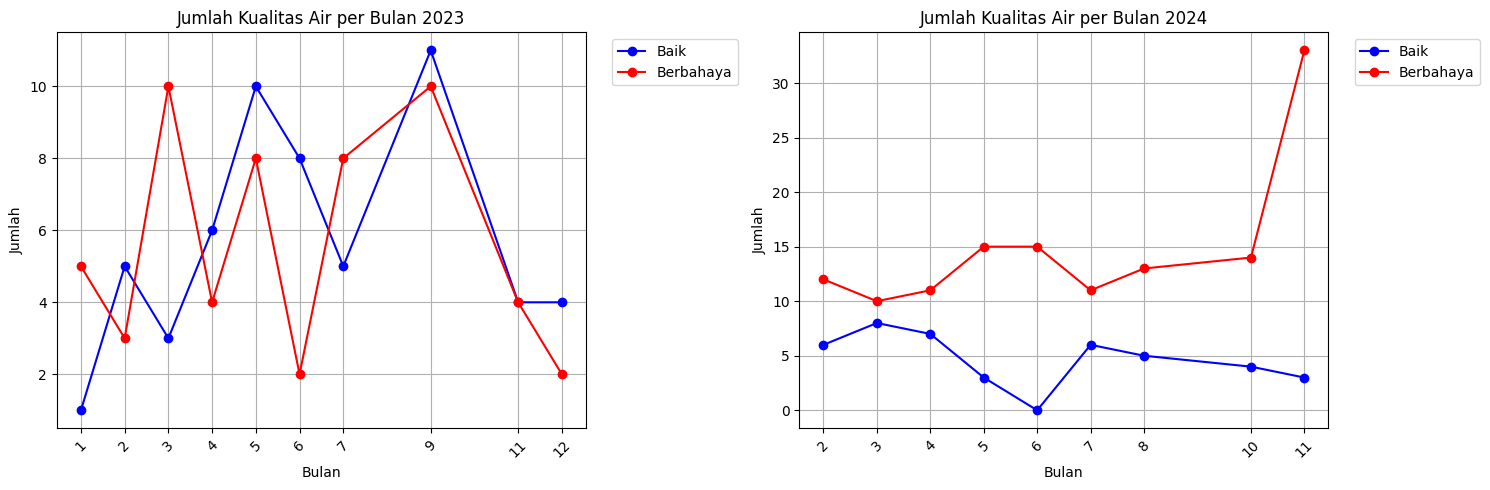

In [56]:
# Pastikan 'Bulan' adalah integer untuk sorting
df2['Bulan'] = df2['Bulan'].astype(int)

# Hitung jumlah untuk masing-masing tahun dan urutkan berdasarkan Bulan
jumlah_2023 = df2[df2['Tahun'] == 2023].groupby('Bulan')['Kualitas_Air'].value_counts().unstack(fill_value=0).sort_index()
jumlah_2024 = df2[df2['Tahun'] == 2024].groupby('Bulan')['Kualitas_Air'].value_counts().unstack(fill_value=0).sort_index()

# Visualisasi line chart untuk bulan dengan kualitas air baik dan berbahaya
plt.figure(figsize=(15, 5))

# Tahun 2023
plt.subplot(1, 2, 1)
plt.plot(jumlah_2023.index, jumlah_2023['Baik'], marker='o', linestyle='-', color='b', label='Baik')
plt.plot(jumlah_2023.index, jumlah_2023['Berbahaya'], marker='o', linestyle='-', color='r', label='Berbahaya')
plt.title("Jumlah Kualitas Air per Bulan 2023")
plt.xlabel("Bulan")
plt.ylabel("Jumlah")
plt.xticks(jumlah_2023.index, labels=jumlah_2023.index.astype(str), rotation=45)
plt.grid()
plt.legend(loc='upper right', bbox_to_anchor=(1.30, 1))

# Tahun 2024
plt.subplot(1, 2, 2)
plt.plot(jumlah_2024.index, jumlah_2024['Baik'], marker='o', linestyle='-', color='b', label='Baik')
plt.plot(jumlah_2024.index, jumlah_2024['Berbahaya'], marker='o', linestyle='-', color='r', label='Berbahaya')
plt.title("Jumlah Kualitas Air per Bulan 2024")
plt.xlabel("Bulan")
plt.ylabel("Jumlah")
plt.xticks(jumlah_2024.index, labels=jumlah_2024.index.astype(str), rotation=45)
plt.grid()
plt.legend(loc='upper right', bbox_to_anchor=(1.30, 1))

plt.tight_layout()
plt.show()


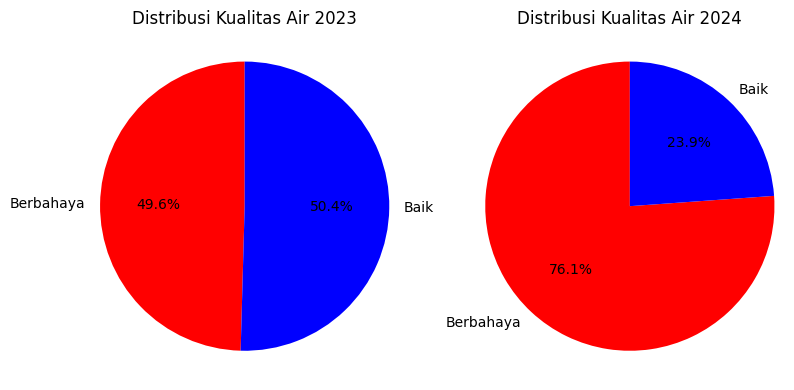

In [61]:
# Hitung total untuk kategori 'Baik' dan 'Berbahaya' tahun 2023
total_berbahaya_2023 = jumlah_2023['Berbahaya'].sum()
total_baik_2023 = jumlah_2023['Baik'].sum()

# Hitung total untuk kategori 'Baik' dan 'Berbahaya' tahun 2024
total_berbahaya_2024 = jumlah_2024['Berbahaya'].sum()
total_baik_2024 = jumlah_2024['Baik'].sum()

# Data untuk pie chart tahun 2023
data_2023 = [total_berbahaya_2023, total_baik_2023]
labels = ['Berbahaya', 'Baik']
colors = ['red', 'blue']

# Data untuk pie chart tahun 2024
data_2024 = [total_berbahaya_2024, total_baik_2024]

# Visualisasi pie chart untuk tahun 2023 dan 2024 dalam satu figure berdampingan
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Pie chart untuk tahun 2023
axes[0].pie(data_2023, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
axes[0].set_title("Distribusi Kualitas Air 2023")
axes[0].axis('equal')

# Pie chart untuk tahun 2024
axes[1].pie(data_2024, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
axes[1].set_title("Distribusi Kualitas Air 2024")
axes[1].axis('equal')

# Menampilkan grafik
plt.tight_layout()
plt.show()


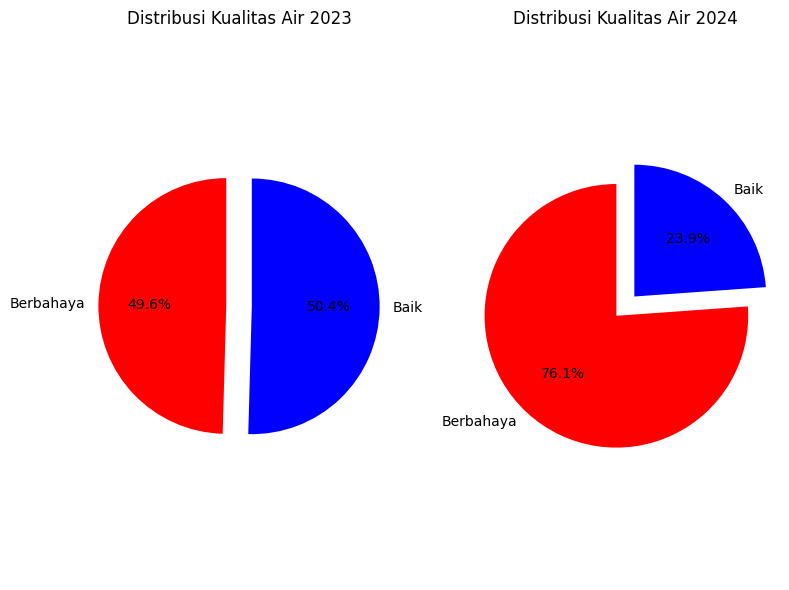

In [63]:
# Hitung total untuk kategori 'Baik' dan 'Berbahaya' tahun 2023
total_berbahaya_2023 = jumlah_2023['Berbahaya'].sum()
total_baik_2023 = jumlah_2023['Baik'].sum()

# Hitung total untuk kategori 'Baik' dan 'Berbahaya' tahun 2024
total_berbahaya_2024 = jumlah_2024['Berbahaya'].sum()
total_baik_2024 = jumlah_2024['Baik'].sum()

# Data untuk pie chart tahun 2023
data_2023 = [total_berbahaya_2023, total_baik_2023]
labels_2023 = ['Berbahaya', 'Baik']
explode_2023 = [0.1] * len(data_2023)  # Membuat jarak pada semua kategori

# Data untuk pie chart tahun 2024
data_2024 = [total_berbahaya_2024, total_baik_2024]
labels_2024 = ['Berbahaya', 'Baik']
explode_2024 = [0.1] * len(data_2024)

# Membuat figure dengan dua subplot untuk grafik pie chart
fig, axes = plt.subplots(1, 2, figsize=(8, 6))

# Pie chart untuk tahun 2023
axes[0].pie(data_2023, labels=labels_2023, autopct='%1.1f%%', startangle=90, explode=explode_2023, colors=['red', 'blue'])
axes[0].set_title("Distribusi Kualitas Air 2023")
axes[0].axis('equal')  # Membuat pie chart berbentuk lingkaran sempurna

# Pie chart untuk tahun 2024
axes[1].pie(data_2024, labels=labels_2024, autopct='%1.1f%%', startangle=90, explode=explode_2024, colors=['red', 'blue'])
axes[1].set_title("Distribusi Kualitas Air 2024")
axes[1].axis('equal')  # Membuat pie chart berbentuk lingkaran sempurna

# Menampilkan grafik
plt.tight_layout()
plt.show()


In [40]:
# Fungsi untuk memberikan solusi berdasarkan parameter yang melebihi baku mutu
def check_exceedances_per_month(df):
    solusi_list = []

    # Kelompokkan data berdasarkan bulan dan tahun
    grouped = df.groupby(['Tahun', 'Bulan'])

    for (tahun, bulan), group in grouped:
        max_exceedance = {
            'parameter': None,
            'value': -1,
            'kelas': None
        }

        for index, row in group.iterrows():
            kelas = row['Kelas']
            batas = baku_mutu.get(kelas, {})
            current_exceedance = {}

            # Periksa parameter yang melebihi baku mutu
            if row['pH'] < batas.get('pH_min', float('-inf')) or row['pH'] > batas.get('pH_max', float('inf')):
                exceed_value = abs(row['pH'] - (batas['pH_min'] if row['pH'] < batas['pH_min'] else batas['pH_max']))
                current_exceedance['pH'] = exceed_value
            if row['DO'] < batas.get('DO_min', float('-inf')):
                exceed_value = batas['DO_min'] - row['DO']
                current_exceedance['DO'] = exceed_value
            if row['BOD'] > batas.get('BOD_max', float('inf')):
                exceed_value = row['BOD'] - batas['BOD_max']
                current_exceedance['BOD'] = exceed_value
            if row['COD'] > batas.get('COD_max', float('inf')):
                exceed_value = row['COD'] - batas['COD_max']
                current_exceedance['COD'] = exceed_value
            if row['TSS'] > batas.get('TSS_max', float('inf')):
                exceed_value = row['TSS'] - batas['TSS_max']
                current_exceedance['TSS'] = exceed_value
            if row['Nitrat'] > batas.get('Nitrat_max', float('inf')):
                exceed_value = row['Nitrat'] - batas['Nitrat_max']
                current_exceedance['Nitrat'] = exceed_value
            if row['Fosfat'] > batas.get('Fosfat_max', float('inf')):
                exceed_value = row['Fosfat'] - batas['Fosfat_max']
                current_exceedance['Fosfat'] = exceed_value

            # Cek parameter yang melebihi batas maksimum
            for param, exceed_value in current_exceedance.items():
                if exceed_value > max_exceedance['value']:
                    max_exceedance['parameter'] = param
                    max_exceedance['value'] = exceed_value
                    max_exceedance['kelas'] = kelas

        # Jika ada parameter yang melebihi baku mutu
        if max_exceedance['parameter']:
            solusi = (f"Sungai kelas {max_exceedance['kelas']} tahun {tahun} bulan {bulan}: "
                      f"Parameter {max_exceedance['parameter']} melebihi baku mutu sebesar "
                      f"{max_exceedance['value']:.2f}. "
                      "Perlu tindakan untuk menurunkan status air.")
            solusi_list.append(solusi)

    return solusi_list

# Terapkan fungsi untuk mendapatkan solusi berdasarkan data
solusi_output = check_exceedances_per_month(df2)

# Tampilkan solusi dengan format yang lebih rapi
print("\n".join(solusi_output))


Sungai kelas 2 tahun 2023 bulan 1: Parameter TSS melebihi baku mutu sebesar 143.00. Perlu tindakan untuk menurunkan status air.
Sungai kelas 2 tahun 2023 bulan 2: Parameter TSS melebihi baku mutu sebesar 346.00. Perlu tindakan untuk menurunkan status air.
Sungai kelas 3 tahun 2023 bulan 3: Parameter TSS melebihi baku mutu sebesar 117.00. Perlu tindakan untuk menurunkan status air.
Sungai kelas 2 tahun 2023 bulan 4: Parameter TSS melebihi baku mutu sebesar 157.00. Perlu tindakan untuk menurunkan status air.
Sungai kelas 2 tahun 2023 bulan 5: Parameter TSS melebihi baku mutu sebesar 133.00. Perlu tindakan untuk menurunkan status air.
Sungai kelas 2 tahun 2023 bulan 6: Parameter BOD melebihi baku mutu sebesar 10.37. Perlu tindakan untuk menurunkan status air.
Sungai kelas 3 tahun 2023 bulan 7: Parameter BOD melebihi baku mutu sebesar 5.38. Perlu tindakan untuk menurunkan status air.
Sungai kelas 2 tahun 2023 bulan 9: Parameter COD melebihi baku mutu sebesar 14.60. Perlu tindakan untuk men

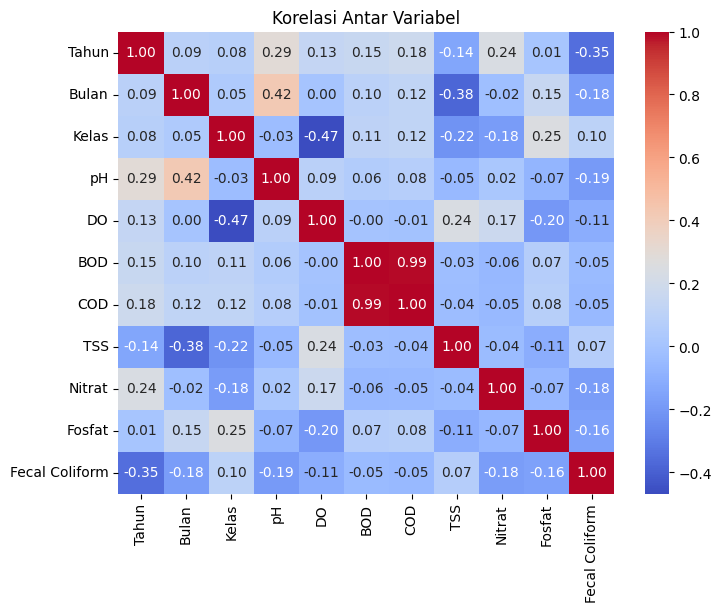

In [59]:
# Korelasi antar variabel numerik
numeric_cols = df2.select_dtypes(include=[np.number])
corr_matrix = numeric_cols.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi Antar Variabel")
plt.show()

## **Konversi Data story Telling**

In [42]:
url='https://drive.google.com/file/d/16RShrtNcnlB8gLWX_EfTlXBoXmHGK7nU/view?usp=drive_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df3 = pd.read_csv(url)

In [43]:
df3.head()

,Lokasi,X,Y,Tanggal,PM10,PM2.5,SO2,CO,O3,NO2,HC
0,Wonorejo,"7,31185","112,7891639",1-Jan-19,12.0,0.0,8.7,0.0,11.8,3.1,0.0
1,Wonorejo,"7,31185","112,7891639",2-Jan-19,12.0,0.0,6.9,0.0,10.1,0.0,0.0
2,Wonorejo,"7,31185","112,7891639",3-Jan-19,8.5,0.0,7.3,0.0,6.0,0.0,0.0
3,Wonorejo,"7,31185","112,7891639",4-Jan-19,4.4,0.0,7.5,0.0,8.8,0.0,0.0
4,Wonorejo,"7,31185","112,7891639",5-Jan-19,3.7,0.0,9.3,0.0,10.4,0.0,0.0


In [44]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6007 entries, 0 to 6006
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Lokasi   6007 non-null   object 
 1   X        6007 non-null   object 
 2   Y        6007 non-null   object 
 3   Tanggal  6007 non-null   object 
 4   PM10     6007 non-null   float64
 5   PM2.5    6007 non-null   float64
 6   SO2      6007 non-null   float64
 7   CO       6007 non-null   float64
 8   O3       6007 non-null   float64
 9   NO2      6007 non-null   float64
 10  HC       6007 non-null   float64
dtypes: float64(7), object(4)
memory usage: 516.4+ KB


In [45]:
df3_filtered = df3[df3['Lokasi'].isin(['Wonorejo', 'Kebonsari'])]

# Menghapus kolom 'PM2.5', 'CO', dan 'HC'
df3_filtered = df3_filtered.drop(columns=['PM2.5', 'CO', 'HC','X','Y'])

# Mengubah format kolom 'Tanggal' menjadi 'YYYY-MM-DD'
df3_filtered['Tanggal'] = pd.to_datetime(df3_filtered['Tanggal'], format='%d-%b-%y').dt.strftime('%Y-%m-%d')

# Menyimpan DataFrame yang sudah difilter ke dalam file Excel
# df3_filtered.to_excel('df_Kebonsari&Wonerejo.xlsx', index=False)

In [46]:
df3_filtered.head()

,Lokasi,Tanggal,PM10,SO2,O3,NO2
0,Wonorejo,2019-01-01,12.0,8.7,11.8,3.1
1,Wonorejo,2019-01-02,12.0,6.9,10.1,0.0
2,Wonorejo,2019-01-03,8.5,7.3,6.0,0.0
3,Wonorejo,2019-01-04,4.4,7.5,8.8,0.0
4,Wonorejo,2019-01-05,3.7,9.3,10.4,0.0


In [47]:
df3_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4244 entries, 0 to 4243
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Lokasi   4244 non-null   object 
 1   Tanggal  4244 non-null   object 
 2   PM10     4244 non-null   float64
 3   SO2      4244 non-null   float64
 4   O3       4244 non-null   float64
 5   NO2      4244 non-null   float64
dtypes: float64(4), object(2)
memory usage: 361.1+ KB


In [48]:
df3_filtered.describe()

,PM10,SO2,O3,NO2
count,4244.000000,4244.000000,4244.000000,4244.00000
mean,31.194769,13.198680,12.248421,8.02262
std,23.091820,27.272934,14.387115,9.91784
min,0.000000,0.000000,0.000000,0.00000
25%,10.375000,0.000000,0.000000,0.00000
50%,29.600000,0.000000,9.200000,3.00000
75%,51.300000,18.500000,19.600000,14.60000
max,182.800000,291.300000,194.200000,65.20000


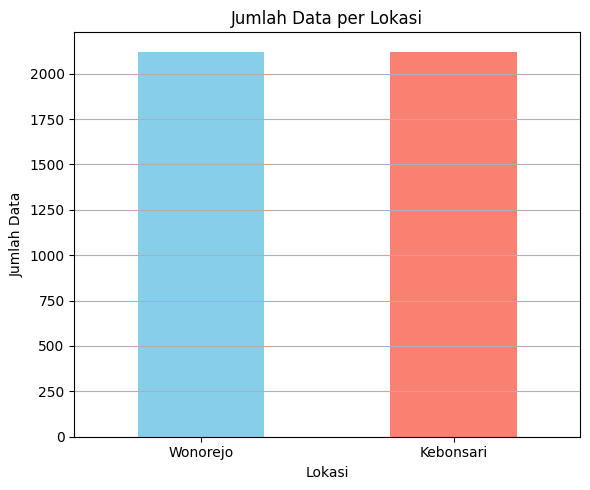

In [49]:
# Menghitung jumlah data untuk setiap lokasi
location_counts = df3_filtered['Lokasi'].value_counts()

# Membuat Bar Chart
plt.figure(figsize=(6, 5))
location_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Jumlah Data per Lokasi')
plt.xlabel('Lokasi')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

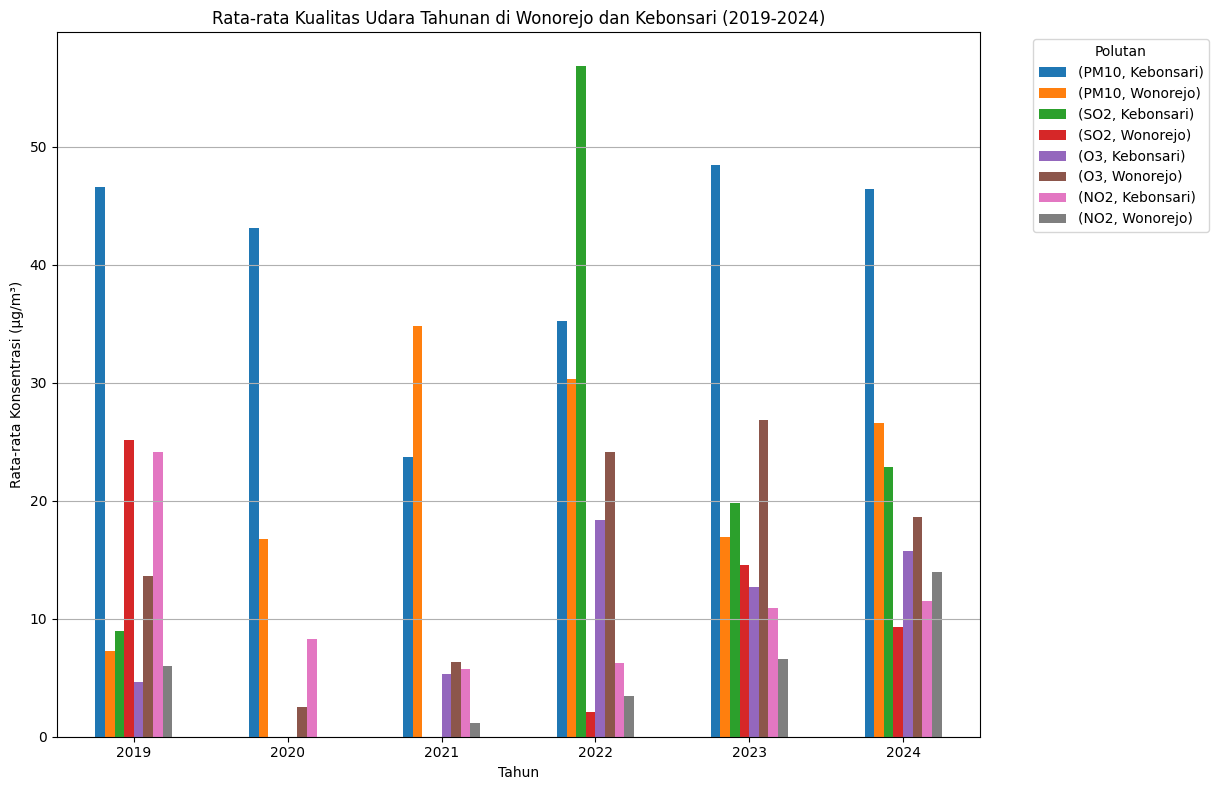

In [50]:
# Memfilter data untuk lokasi 'Wonorejo' dan 'Kebonsari'
filtered_data = df3_filtered[df3_filtered['Lokasi'].isin(['Wonorejo', 'Kebonsari'])]

# Mengubah kolom 'Tanggal' menjadi datetime
filtered_data['Tanggal'] = pd.to_datetime(filtered_data['Tanggal'], errors='coerce')

# Mengelompokkan data berdasarkan tahun dan lokasi, kemudian menghitung rata-rata
filtered_data['Tahun'] = filtered_data['Tanggal'].dt.year
avg_pollutants_yearly = filtered_data.groupby(['Tahun', 'Lokasi'])[['PM10', 'SO2', 'O3', 'NO2']].mean().reset_index()

# Mengubah format data untuk plotting
avg_pollutants_pivot = avg_pollutants_yearly.pivot(index='Tahun', columns='Lokasi', values=['PM10', 'SO2', 'O3', 'NO2'])

# Membuat Bar Chart
plt.figure(figsize=(12, 8))
avg_pollutants_pivot.plot(kind='bar', figsize=(10, 8))
plt.title('Rata-rata Kualitas Udara Tahunan di Wonorejo dan Kebonsari (2019-2024)')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Konsentrasi (µg/m³)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.legend(title='Polutan', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

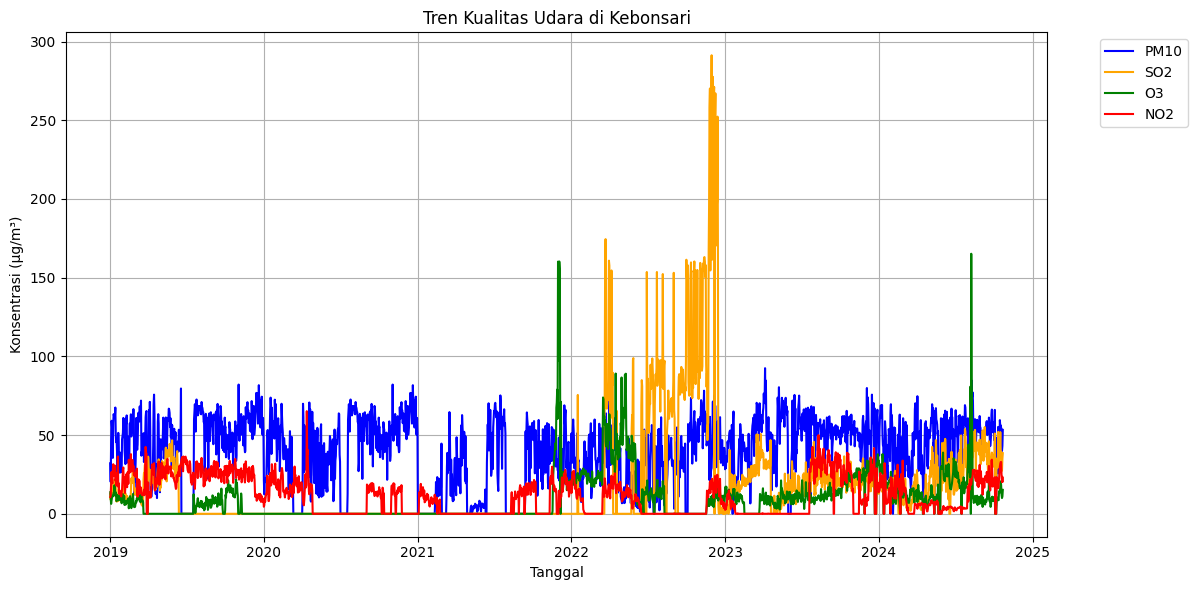

In [51]:
# Memfilter data untuk lokasi 'Wonerejo' dan 'Kebonsari'
filtered_data = df3_filtered[df3_filtered['Lokasi'].isin(['Wonorejo', 'Kebonsari'])]

# Mengubah kolom 'Tanggal' menjadi datetime dengan inferensi format
filtered_data['Tanggal'] = pd.to_datetime(filtered_data['Tanggal'], errors='coerce')

# Mengelompokkan data berdasarkan tanggal dan lokasi, kemudian menghitung rata-rata
daily_avg = filtered_data.groupby(['Tanggal', 'Lokasi']).mean().reset_index()

# Membuat Line Chart untuk Kebonsari
plt.figure(figsize=(12, 6))
kebonsari_data = daily_avg[daily_avg['Lokasi'] == 'Kebonsari']
plt.plot(kebonsari_data['Tanggal'], kebonsari_data['PM10'], label='PM10', color='blue')
plt.plot(kebonsari_data['Tanggal'], kebonsari_data['SO2'], label='SO2', color='orange')
plt.plot(kebonsari_data['Tanggal'], kebonsari_data['O3'], label='O3', color='green')
plt.plot(kebonsari_data['Tanggal'], kebonsari_data['NO2'], label='NO2', color='red')
plt.title('Tren Kualitas Udara di Kebonsari')
plt.xlabel('Tanggal')
plt.ylabel('Konsentrasi (µg/m³)')
plt.grid()
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.tight_layout()
plt.show()

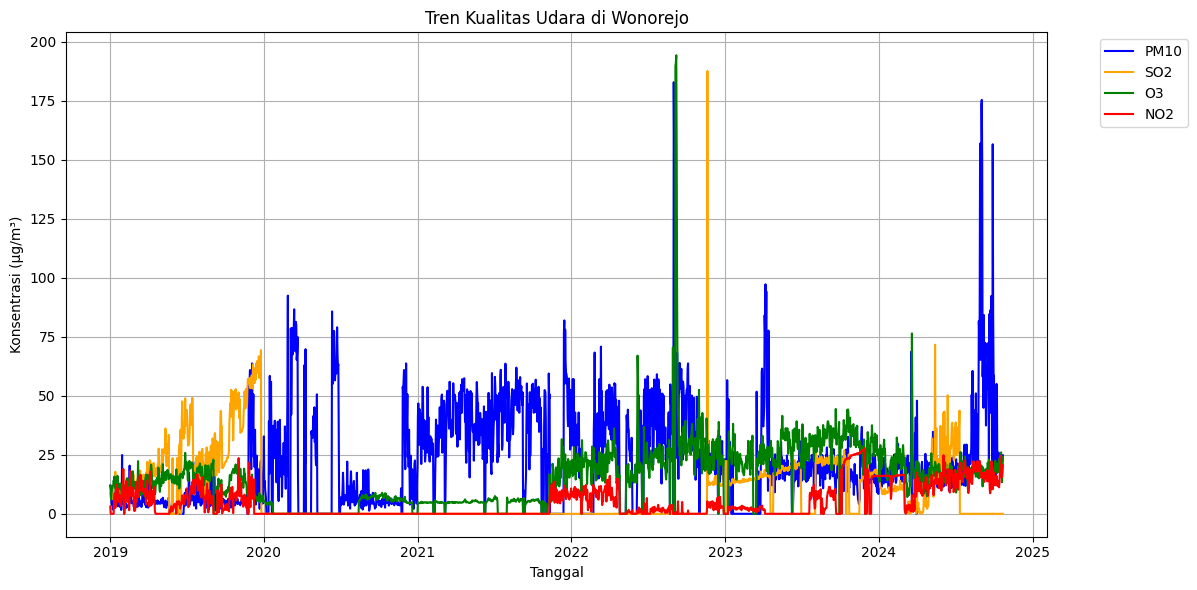

In [52]:
# Membuat Line Chart untuk Wonerejo
plt.figure(figsize=(12, 6))
wonerejo_data = daily_avg[daily_avg['Lokasi'] == 'Wonorejo']
plt.plot(wonerejo_data['Tanggal'], wonerejo_data['PM10'], label='PM10', color='blue')
plt.plot(wonerejo_data['Tanggal'], wonerejo_data['SO2'], label='SO2', color='orange')
plt.plot(wonerejo_data['Tanggal'], wonerejo_data['O3'], label='O3', color='green')
plt.plot(wonerejo_data['Tanggal'], wonerejo_data['NO2'], label='NO2', color='red')
plt.title('Tren Kualitas Udara di Wonorejo')
plt.xlabel('Tanggal')
plt.ylabel('Konsentrasi (µg/m³)')
plt.grid()
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.tight_layout()
plt.show()

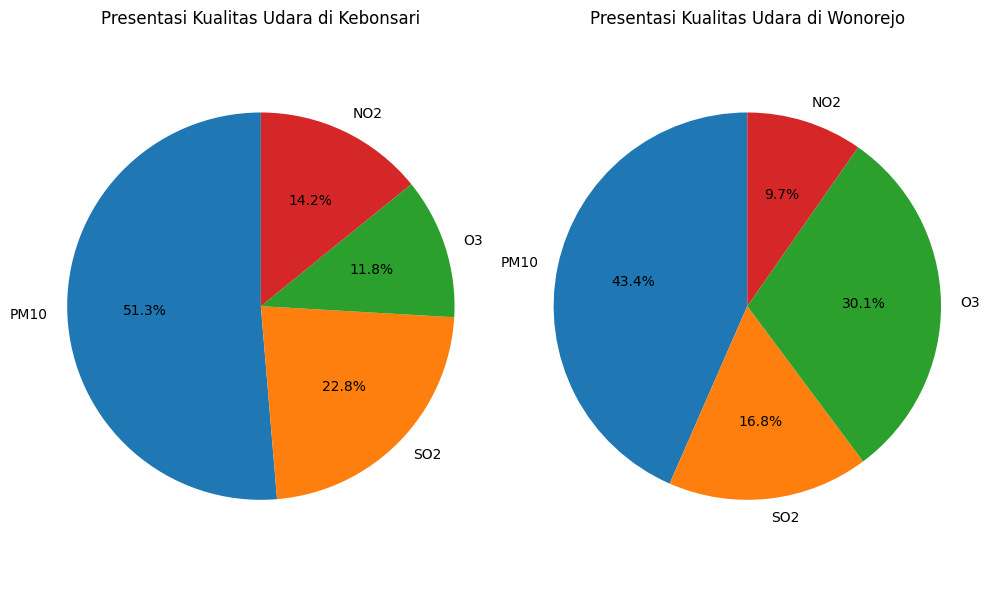

In [53]:
# Memfilter data untuk lokasi 'Wonerejo' dan 'Kebonsari'
filtered_data = df3_filtered[df3_filtered['Lokasi'].isin(['Wonorejo', 'Kebonsari'])]

# Menghitung rata-rata untuk setiap polutan berdasarkan lokasi
avg_pollutants = filtered_data.groupby('Lokasi')[['PM10', 'SO2', 'O3', 'NO2']].mean()

# Membuat subplots untuk Pie Charts
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

# Pie Chart untuk Kebonsari
axs[0].pie(avg_pollutants.loc['Kebonsari'], labels=avg_pollutants.columns, autopct='%1.1f%%', startangle=90)
axs[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axs[0].set_title('Presentasi Kualitas Udara di Kebonsari')

# Pie Chart untuk Wonerejo
axs[1].pie(avg_pollutants.loc['Wonorejo'], labels=avg_pollutants.columns, autopct='%1.1f%%', startangle=90)
axs[1].axis('equal')
axs[1].set_title('Presentasi Kualitas Udara di Wonorejo')

plt.tight_layout()
plt.show()

## **Analitik Data Kota Cerdas Berkelanjutan**